# 탐색적 데이터 분석 (EDA)

### 목차
(1) 데이터 및 라이브러리 준비

(2) 탐색적 데이터 분석

1. 수치형 변수 
    - 1.1 통계량 확인 
    - 1.2 변수간 상관계수 확인
    - 1.3 히스토그램 분포확인
2. 명목형 변수 
    - 2.1 분포확인
3. 관객수 상위 10% 영화 분석
    - 3.1 장르분석
    - 3.2 배우 분석

(3) 분석 결과


# (1) 데이터 및 라이브러리 준비

### * 라이브러리

In [ ]:
# plotly 시각화 라이브러리
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from collections import Counter



### * 데이터 불러오기
- 분석용용 데이터 파일 : 'train_final.csv', 'test_final.csv' 

In [ ]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
print(IN_COLAB)

True


In [ ]:
if IN_COLAB:
  print("colab mode")
  from google.colab import drive
  drive.mount("/content/working_drive")
  train_final_file = '/content/working_drive/MyDrive/빅예분4팀 /dataset/train_final.csv'
  test_final_file = '/content/working_drive/MyDrive/빅예분4팀 /dataset/test_final.csv'
else:
  print("not colab mode")
  train_final_file = './dataset/train_final.csv'
  test_final_file = './dataset/test_final.csv'


colab mode
Drive already mounted at /content/working_drive; to attempt to forcibly remount, call drive.mount("/content/working_drive", force_remount=True).


In [ ]:
# 데이터 불러오기
train = pd.read_csv(train_final_file)
test = pd.read_csv(test_final_file)

### * 범주형 데이터 'category' 타입으로 변경


In [ ]:
# 기존 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 600 non-null    object 
 1   distributor           600 non-null    object 
 2   genre                 600 non-null    object 
 3   release_time          600 non-null    object 
 4   time                  600 non-null    int64  
 5   screening_rat         600 non-null    object 
 6   director              600 non-null    object 
 7   dir_prev_bfnum        600 non-null    float64
 8   dir_prev_num          600 non-null    int64  
 9   num_staff             600 non-null    int64  
 10  num_actor             600 non-null    int64  
 11  box_off_num           600 non-null    int64  
 12  actors                600 non-null    object 
 13  review_cnt            600 non-null    int64  
 14  distributor_rank      600 non-null    int64  
 15  genre_rank            6

In [ ]:
train['release_time_month'] = train['release_time_month'].astype('category')
train['release_time_year']= train['release_time_year'].astype('category')
train['release_time_weekday']= train['release_time_weekday'].astype('category')
train['season'] = train['season'].astype('category')
train['holiday'] = train['holiday'].astype('category')
# 변경 후
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   title                 600 non-null    object  
 1   distributor           600 non-null    object  
 2   genre                 600 non-null    object  
 3   release_time          600 non-null    object  
 4   time                  600 non-null    int64   
 5   screening_rat         600 non-null    object  
 6   director              600 non-null    object  
 7   dir_prev_bfnum        600 non-null    float64 
 8   dir_prev_num          600 non-null    int64   
 9   num_staff             600 non-null    int64   
 10  num_actor             600 non-null    int64   
 11  box_off_num           600 non-null    int64   
 12  actors                600 non-null    object  
 13  review_cnt            600 non-null    int64   
 14  distributor_rank      600 non-null    int64   
 15  genre_

### * 전체 데이터 살펴보기

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,...,review_cnt,distributor_rank,genre_rank,actor_max_num,actor_max,release_time_month,release_time_year,release_time_weekday,season,holiday
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,...,134,134,11,3752789.0,김무열,11,2012,3,4,0
1,내부자들,쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,...,2779,145,12,4745863.8,이병헌,11,2015,3,4,0
2,은밀하게 위대하게,쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,...,3028,145,11,3487385.0,김수현,6,2013,2,3,0
3,나는 공무원이다,NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,...,248,140,9,679544.0,윤제문,7,2012,3,3,0
4,불량남녀,쇼박스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,...,229,145,9,661605.8,임창정,11,2010,3,4,0


In [ ]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,...,review_cnt,distributor_rank,genre_rank,actor_max_num,actor_max,release_time_month,release_time_year,release_time_weekday,season,holiday
595,해무,NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,...,1407,140,8,4.775573e+06,김윤석,8,2014,2,3,0
596,파파로티,쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,...,1060,145,8,4.733665e+06,한석규,3,2013,3,2,0
597,살인의 강,마운틴픽처스,공포,2010-09-30,99,청소년 관람불가,김대현,0.0,0,123,...,18,46,7,2.475000e+03,김다현,9,2010,3,4,0
598,악의 연대기,CJ,느와르,2015-05-14,102,15세 관람가,백운학,0.0,0,431,...,1231,141,12,3.131131e+06,손현주,5,2015,3,2,0
599,베를린,CJ,액션,2013-01-30,120,15세 관람가,류승완,0.0,0,363,...,2905,141,11,4.291705e+06,하정우,1,2013,2,1,0


In [ ]:
train.isna().sum()

title                   0
distributor             0
genre                   0
release_time            0
time                    0
screening_rat           0
director                0
dir_prev_bfnum          0
dir_prev_num            0
num_staff               0
num_actor               0
box_off_num             0
actors                  0
review_cnt              0
distributor_rank        0
genre_rank              0
actor_max_num           0
actor_max               0
release_time_month      0
release_time_year       0
release_time_weekday    0
season                  0
holiday                 0
dtype: int64

# (2) 탐색적 데이터 분석

## 1. 수치형 변수
## 1.1 통계량 확인

### pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 
 
 
 
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
   - 아래쪽 울타리: $Q_1$ - $1.5 * IQR$
   - 위쪽 울타리: $Q_3$ + $1.5 * IQR$
   - $IQR$ = $Q_3 - Q_1$
 
 
<img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="600" height="600">

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,review_cnt,distributor_rank,genre_rank,actor_max_num
count,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00
mean,100.86,472699.30,0.88,151.12,3.71,708181.75,380.33,93.52,6.79,1137479.00
std,18.10,1309474.31,1.18,165.65,2.45,1828005.85,674.60,43.39,2.80,1829383.80
min,45.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00
25%,89.00,0.00,0.00,17.00,2.00,1297.25,23.00,53.75,5.00,3056.00
50%,100.00,0.00,0.00,82.50,3.00,12591.00,79.50,99.00,8.00,148274.42
75%,114.00,376141.62,2.00,264.00,4.00,479886.75,422.75,134.25,8.00,1662979.00
max,180.00,17615314.00,5.00,869.00,25.00,14262766.00,4758.00,147.00,12.00,12811435.00


## 1.2. 변수간 상관계수 확인
상관계수: 두 개의 변수가 같이 일어나는 정도를 나타내는 수치
- -1~1 사이의 값을 가짐. 일반적으로 0.25 이상이면 상관성이 있다고 본다.

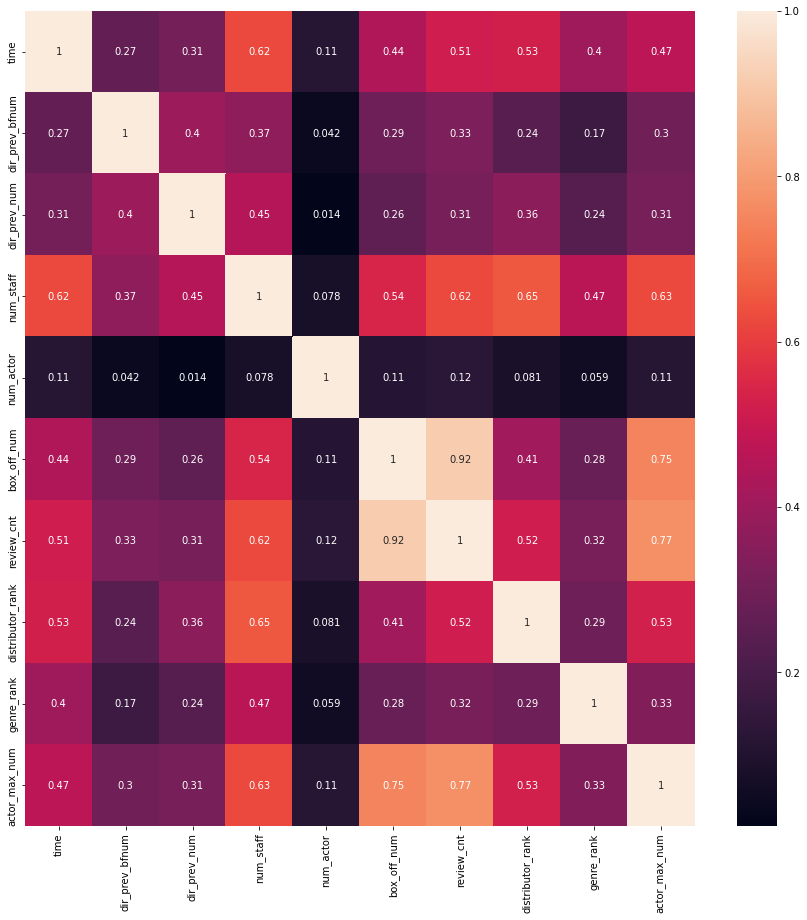

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot = True)
plt.show()

In [ ]:
train.corr()['box_off_num'].sort_values(ascending=False)

box_off_num        1.00
review_cnt         0.92
actor_max_num      0.75
num_staff          0.54
time               0.44
distributor_rank   0.41
dir_prev_bfnum     0.29
genre_rank         0.28
dir_prev_num       0.26
num_actor          0.11
Name: box_off_num, dtype: float64

- `actor_max_num`(0.75), `num_staff`(0.54), `time`(0.44), `distributor_rank`(0.41), `dir_prev_bfnum`(0.29), `genre_rank`(0.28), `dir_prev_num`(0.26)

## 1.3. 히스토그램으로 변수 분포 확인

- actor_max_num, num_staff, time, distributor_rank, dir_prev_bfnum, genre_rank, dir_prev_num

In [ ]:
fig = make_subplots(rows=3, cols=3,
                   subplot_titles=("actor_max_num", "num_staff", "time",
                                   "distributor_rank", "dir_prev_bfnum", "genre_rank",
                                   "dir_prev_num", "box_off_num"),
                   specs=[[{},{},{}],[{},{},{}],[{}, {"colspan": 2}, None]],)

fig.add_trace(go.Histogram(x=train["actor_max_num"],name="actor_max_num"), row=1, col=1) # 로그 변환 필요
fig.add_trace(go.Histogram(x=train["num_staff"],name="num_staff"), row=1, col=2) # 로그 변환 필요
fig.add_trace(go.Histogram(x=train["time"],name="time"), row=1, col=3)

fig.add_trace(go.Histogram(x=train["distributor_rank"],name="distributor_rank"), row=2, col=1)
fig.add_trace(go.Histogram(x=train["dir_prev_bfnum"],name="dir_prev_bfnum"), row=2, col=2) 
fig.add_trace(go.Histogram(x=train["genre_rank"],name="genre_rank"), row=2, col=3)

fig.add_trace(go.Histogram(x=train["dir_prev_num"],name="dir_prev_num"), row=3, col=1)
fig.add_trace(go.Histogram(x=train["box_off_num"],name="box_off_num"), row=3, col=2)

fig.update_layout(height=800, title_text="빈도분석")
fig.show()

-  오른쪽으로 꼬리가 긴 분포를 가진 변수에는 log 변환 필요

- 
|변수|일반적인 변환|
|:---:|:---:|
|매출, 판매수량, 가격, 가구소득|log(x)|
|지리적 거리| 1/x, 1/x2|
|효용에 근거한 시장점유율, 선호점유율|ex / 1+ex|
|우측으로 꼬리가 긴 분포	 |루트x, log(x) |
|좌측으로 꼬리가 긴 분포	|x 2|

In [ ]:
import numpy as np

In [ ]:
fig = make_subplots(rows=3, cols=3,
                   subplot_titles=("actor_max_num - 로그변환", "num_staff - 로그변환", "time",
                                   "distributor_rank", "dir_prev_bfnum - 로그변환", "genre_rank",
                                   "dir_prev_num - 로그변환환", "box_off_num"),
                   specs=[[{},{},{}],[{},{},{}],[{}, {"colspan": 2}, None]],)

fig.add_trace(go.Histogram(x=np.log1p(train["actor_max_num"]),name="actor_max_num"), row=1, col=1) # 로그 변환 필요
fig.add_trace(go.Histogram(x=np.log1p(train["num_staff"]),name="num_staff"), row=1, col=2) # 로그 변환 필요
fig.add_trace(go.Histogram(x=train["time"],name="time"), row=1, col=3)
fig.add_trace(go.Histogram(x=train["distributor_rank"],name="distributor_rank"), row=2, col=1)
fig.add_trace(go.Histogram(x=np.log1p(train["dir_prev_bfnum"]),name="dir_prev_bfnum"), row=2, col=2)  # 로그 변환 필요
fig.add_trace(go.Histogram(x=train["genre_rank"],name="genre_rank"), row=2, col=3)
fig.add_trace(go.Histogram(x=np.log1p(train["dir_prev_num"]),name="dir_prev_num"), row=3, col=1)
fig.add_trace(go.Histogram(x=train["box_off_num"],name="box_off_num"), row=3, col=2)  # 로그 변환 필요

fig.update_layout(height=800, title_text="빈도분석 - 로그 변환")
fig.show()

## 2. 명목형 변수
## 2.1 분포확인 - box plot, bar plot

In [ ]:
release_time_month = train.groupby('release_time_month').box_off_num.mean().to_dict()
release_time_year = train.groupby('release_time_year').box_off_num.mean().to_dict()
release_time_weekday = train.groupby('release_time_weekday').box_off_num.mean().to_dict()
season = train.groupby('season').box_off_num.mean().to_dict()
holiday = train.groupby('holiday').box_off_num.mean().to_dict()
screening_rat = train.groupby('screening_rat').box_off_num.mean().to_dict()


In [ ]:
release_time_month.values(), release_time_month.keys()

(dict_values([1365930.564102564, 663025.1935483871, 273887.3653846154, 258166.70212765958, 575685.245614035, 512286.4827586207, 1113807.2448979593, 1029161.6727272727, 731528.6333333333, 385904.15, 495653.8888888889, 1288247.7346938776]),
 dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))

In [49]:
fig = make_subplots(rows=6, cols=2,  shared_yaxes=True, 
                   subplot_titles=( 
                                    "release_time_year (Box)","release_time_year (Bar)",
                                   "release_time_weekday (Box)", "release_time_weekday (Bar)",
                                   "holiday (Box)", "holiday (Bar)",                                   
                                   "release_time_month (Box)","release_time_month (Bar)",
                                   "season (Box)", "season (Bar)",
                                   "screening_rat (Box)", "screening_rat (Bar)",
                                   ))

fig.add_trace(go.Box(x=train["release_time_year"],y=train["box_off_num"], name="release_time_year", marker_color = 'royalblue'), row=1, col=1)
fig.add_trace(go.Box(x=train["release_time_weekday"],y=train["box_off_num"], name="release_time_weekday", marker_color = 'indianred'), row=2, col=1)
fig.add_trace(go.Box(x=train["holiday"],y=train["box_off_num"], name="holiday", marker_color = 'salmon'), row=3, col=1)

fig.add_trace(go.Box(x=train["release_time_month"],y=train["box_off_num"], name="release_time_month", marker_color = 'darkseagreen'), row=4, col=1)
fig.add_trace(go.Box(x=train["season"],y=train["box_off_num"], name="season", marker_color = 'lightseagreen'), row=5, col=1)
fig.add_trace(go.Box(x=train["screening_rat"],y=train["box_off_num"], name="screening_rat", marker_color = 'orange'), row=6, col=1)

# 카테고리별 관객수 평균값 
fig.add_trace(go.Bar(x=list(release_time_year.keys()),y=list(release_time_year.values()), name="release_time_year",marker_color = 'royalblue'), row=1, col=2)
fig.add_trace(go.Bar(x=list(release_time_weekday.keys()),y=list(release_time_weekday.values()), name="release_time_weekday", marker_color = 'indianred'), row=2, col=2)
fig.add_trace(go.Bar(x=list(holiday.keys()),y=list(holiday.values()), name="holiday", marker_color = 'salmon'), row=3, col=2)

fig.add_trace(go.Bar(x=list(release_time_month.keys()),y=list(release_time_month.values()), name="release_time_month", marker_color = 'darkseagreen'), row=4, col=2)
fig.add_trace(go.Bar(x=list(season.keys()),y=list(season.values()), name="season", marker_color = 'lightseagreen'), row=5, col=2)
fig.add_trace(go.Bar(x=list(screening_rat.keys()),y=list(screening_rat.values()), name="screening_rat", marker_color = 'orange'), row=6, col=2)


fig.update_layout(height=1200, title_text="명목형 변수")
fig.update_yaxes(title="box_off_num", range=[0, 3000000])
fig.show()

-> 명목형 변수 중 screening_rat, season, release_time_weekday가 상관성이 있을 것으로 예상

## 3. 관객수 상위 10% 영화 분석 

In [ ]:
top_movies = train.sort_values(by='box_off_num', ascending=False).head(60)

In [ ]:
type(top_movies), top_movies.shape

(pandas.core.frame.DataFrame, (60, 23))

### 3.1 장르 분석

In [ ]:
top_genre = list(top_movies.genre)
genre_counter = Counter(top_genre) #.most_common()

In [ ]:
labels = list(genre_counter.keys())
values = list(genre_counter.values())

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title="top 60 movies' genre")
fig.show()

### 3.2 배우 분석

In [ ]:
top_actors = list(top_movies.actors)
top_actors = "|".join(top_actors).split("|")
#top_actors

In [ ]:
actors_num = Counter(top_actors) #.most_common()

In [ ]:
actors_num

Counter({'황정민': 3,
         '김윤진': 2,
         '오달수': 4,
         '김윤석': 3,
         '김혜수': 1,
         '이정재': 4,
         '류승룡': 4,
         '박신혜': 1,
         '갈소원': 1,
         '전지현': 1,
         '하정우': 5,
         '이병헌': 3,
         '한효주': 4,
         '송강호': 3,
         '김영애': 1,
         '크리스 에반스': 1,
         '에드 해리스': 1,
         '백윤식': 3,
         '김남길': 1,
         '손예진': 3,
         '심은경': 2,
         '나문희': 1,
         '박인환': 1,
         '정우': 1,
         '박해일': 2,
         '김무열': 1,
         '유호정': 1,
         '강소라': 1,
         '한석규': 1,
         '류승범': 3,
         '조승우': 2,
         '김수현': 1,
         '박기웅': 1,
         '이현우': 1,
         '원빈': 1,
         '김새론': 1,
         '손현주': 2,
         '문정희': 2,
         '전미선': 1,
         '설경구': 2,
         '정우성': 2,
         '강동원': 2,
         '김상경': 1,
         '조병만': 1,
         '강계열': 1,
         '김명민': 3,
         '한지민': 1,
         '최민식': 2,
         '임수정': 1,
         '이선균': 3,
         '김동완': 1,
         '엄태웅': 2,
       

In [ ]:
# top 60개 영화 배우 정보 - 전체
fig = go.Figure([
    go.Bar(
        x=list(actors_num.keys()), y=list(actors_num.values()),
    # orientation='h',
    )
])
fig.update_layout(xaxis={'categoryorder': 'total descending'}, title="top 60 movies' actors")
fig.show()

In [ ]:
# top 60개 영화 배우 정보 - 3번 이상 출연 배우
actors_num_main = {k:v for k, v in actors_num.items() if v >= 3 }
fig = go.Figure([
    go.Bar(
        y=list(actors_num_main.keys()), x=list(actors_num_main.values()),
    orientation='h',
    )
])
fig.update_layout(width=500,yaxis={'categoryorder': 'total ascending'}, title="top 60 movies' actors", height=700)

fig.show()

In [ ]:
list(actors_num_main.keys())

['황정민',
 '오달수',
 '김윤석',
 '이정재',
 '류승룡',
 '하정우',
 '이병헌',
 '한효주',
 '송강호',
 '백윤식',
 '손예진',
 '류승범',
 '김명민',
 '이선균',
 '안성기',
 '고수']

https://suy379.tistory.com/123
범주형 데이터 EDA참고


# (3) 분석 결과
### * EDA 분석 결과  
- 수치형 변수들을 정규화 하는 과정을 거치면 정확도가 상승할 것으로 예상
- 수치형 변수 중 `actor_max_num`(0.75), `num_staff`(0.54), `time`(0.44), `distributor_rank`(0.41), `dir_prev_bfnum`(0.29), `genre_rank`(0.28), `dir_prev_num`(0.26) 이 관객수와 상관성이 있을 것으로 예상 
- 명목형 변수 중  `screening_rat`, `season`, `release_time_weekday`가 상관성이 있을 것으로 예상
- 2010년대 국내 영화계를 주도한 배우는 하정우, 황정민, 오달수, 김윤석, 이정재, 류승룡,  이병헌, 한효주, 송강호, 백윤식, 손예진, 류승범, 김명민, 이선균, 안성기, 고수 배우일 것이다. 
- 드라마 > 느와르 > 코미디 > 액션 영화 순으로 흥행

###  * EDA 분석 결과 의미있는 변수
- ['time','dir_prev_bfnum','dir_prev_num','num_staff','box_off_num','distributor_rank','genre_rank','actor_max_num','holiday','season','release_time_weekday', 'screening_rat']